**MOUNT DRIVE**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#IMPORT THƯ VIỆN

In [2]:
import os
import numpy as np
import cv2 as cv
from keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import preprocess_input
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.preprocessing.image import img_to_array, ImageDataGenerator
import matplotlib.pyplot as plt
import glob
import random

In [3]:
img_dimensions = (100,100,3)
data = []
labels = []

**TRUYỀN PATH TRAIN VÀ TEST**

In [4]:
train_path = '/content/drive/MyDrive/Gender_Dataset/GD_data/Train'
test_path = '/content/drive/MyDrive/Gender_Dataset/GD_data/Test'

**SỐ LƯỢNG IMAGE BỘ LỚP TRAIN VÀ SỐ LỚP**

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (100,100),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8956 images belonging to 2 classes.


#ĐỌC ẢNH TRONG TẬP TRAIN VÀ PHÂN LOẠI

male: 0

female: 1

In [5]:
image_files = [f for f in glob.glob(train_path + "/**/*", recursive=True) if not os.path.isdir(f)]
random.shuffle(image_files)

In [6]:
for img in image_files:

    image = cv.imread(img)
    
    image = cv.resize(image, (img_dimensions[0],img_dimensions[1]))
    image = img_to_array(image)
    data.append(image)

    label = img.split(os.path.sep)[-2] # /content/drive/MyDrive/Gender_Dataset/GD_data/Train/female/*
    if label == "female":
        label = 1
    else:
        label = 0
        
    labels.append([label]) # [[1], [0], [0], ...]


#TIỀN XỬ LÝ DỮ LIỆU VÀ PHÂN BỔ THÀNH TẬP TRAIN VÀ VAL

In [7]:
# pre-processing
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
# split dataset for training and validation
(X_train, X_val, y_train, y_val) = train_test_split(data, labels, test_size=0.2, random_state=40)

# convert to one_hot vector
y_train = to_categorical(y_train, num_classes=2) # [[1, 0], [0, 1], [0, 1], ...]
y_val = to_categorical(y_val, num_classes=2)

#XÂY DỰNG MODEL CNN

In [8]:
#Model CNN
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), input_shape = (100, 100, 3), activation = 'relu',padding='valid'))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 2, activation = 'softmax'))
model.summary()

# set compole parameter optimizer algorthem, loss function and accuracy.
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 32)       0

**FIT MODEL BẰNG TẬP TRAIN VÀ TẬP VAL**

EPOCHS = 20

In [9]:
H = model.fit(X_train, y_train, steps_per_epoch=10, epochs=20, validation_data=(X_val, y_val), validation_steps=20, verbose=2)

Epoch 1/20
10/10 - 59s - loss: 0.6881 - accuracy: 0.5380 - val_loss: 0.6819 - val_accuracy: 0.5530 - 59s/epoch - 6s/step
Epoch 2/20
10/10 - 57s - loss: 0.6655 - accuracy: 0.6044 - val_loss: 0.6555 - val_accuracy: 0.5999 - 57s/epoch - 6s/step
Epoch 3/20
10/10 - 59s - loss: 0.6375 - accuracy: 0.6355 - val_loss: 0.6183 - val_accuracy: 0.6596 - 59s/epoch - 6s/step
Epoch 4/20
10/10 - 56s - loss: 0.6221 - accuracy: 0.6482 - val_loss: 0.5985 - val_accuracy: 0.6903 - 56s/epoch - 6s/step
Epoch 5/20
10/10 - 57s - loss: 0.5851 - accuracy: 0.6943 - val_loss: 0.5791 - val_accuracy: 0.7054 - 57s/epoch - 6s/step
Epoch 6/20
10/10 - 57s - loss: 0.5417 - accuracy: 0.7342 - val_loss: 0.5049 - val_accuracy: 0.7796 - 57s/epoch - 6s/step
Epoch 7/20
10/10 - 57s - loss: 0.4929 - accuracy: 0.7736 - val_loss: 0.4471 - val_accuracy: 0.8064 - 57s/epoch - 6s/step
Epoch 8/20
10/10 - 59s - loss: 0.4514 - accuracy: 0.7951 - val_loss: 0.4034 - val_accuracy: 0.8337 - 59s/epoch - 6s/step
Epoch 9/20
10/10 - 57s - loss: 0

**LƯU MODEL**

In [ ]:
model.save('/content/drive/MyDrive/Gender_Dataset/GD_data/GD_model_CNN.h5')

#BIỂU ĐỒ ĐÁNH GIÁ MODEL VỚI TẬP TRAIN VÀ VAL

ACCURANCY

LOSS

56/56 - 4s - loss: 0.2648 - accuracy: 0.8990 - 4s/epoch - 71ms/step
Val Accuracy: 0.9
Val Loss: 0.2648477554321289


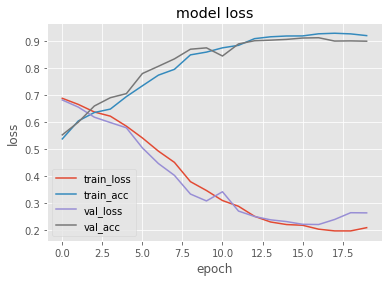

In [10]:
plt.style.use('ggplot')
plt.figure()
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=2)
print('Val Accuracy:', round(val_acc,2))
print('Val Loss:', val_loss)

plt.plot(H.history['loss'],label="train_loss")
plt.plot(H.history['accuracy'], label="train_acc")
plt.plot(H.history['val_loss'],label="val_loss")
plt.plot(H.history['val_accuracy'], label="val_acc")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.savefig('plot1.png')
plt.show()